In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [3]:
#Annotation of Image
data=[]
paths=[]
results=[]

for r,d,f in os.walk(r'D:\Logos\Real'):
    for file in f:
        paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[0]]).toarray())

In [4]:
len(results)

226

In [5]:
len(data)

226

In [6]:
paths = []
for r, d, f in os.walk(r"D:\Logos\Fake"):
    for file in f:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[1]]).toarray())

In [7]:
len(data)

425

In [8]:
len(results)

425

In [9]:
data=np.array(data)
data.shape

(425, 128, 128, 3)

In [10]:
results=np.array(results)
results.shape

(425, 1, 2)

In [11]:
results[0]

array([[1., 0.]])

In [12]:
results=results.reshape(425,2)

In [13]:
#Splitting of train data test data
x_train,x_test,y_train,y_test=train_test_split(data,results,test_size=0.2,shuffle=True)

In [14]:
x_train.shape

(340, 128, 128, 3)

In [15]:
y_train.shape

(340, 2)

In [16]:
#Defining Model Architecture
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [17]:
#Training of Model
history=model.fit(x_train,y_train,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
11/11 [==============================] - 20s 2s/step - loss: 21.9500 - val_loss: 9.8688
Epoch 2/30
11/11 [==============================] - 17s 1s/step - loss: 9.8745 - val_loss: 7.9324
Epoch 3/30
11/11 [==============================] - 16s 1s/step - loss: 4.4251 - val_loss: 25.0574
Epoch 4/30
11/11 [==============================] - 16s 1s/step - loss: 3.2119 - val_loss: 3.6870
Epoch 5/30
11/11 [==============================] - 15s 1s/step - loss: 1.3080 - val_loss: 5.6285
Epoch 6/30
11/11 [==============================] - 16s 1s/step - loss: 0.7517 - val_loss: 5.1995
Epoch 7/30
11/11 [==============================] - 16s 1s/step - loss: 0.7196 - val_loss: 4.7648
Epoch 8/30
11/11 [==============================] - 16s 1s/step - loss: 0.5824 - val_loss: 3.8005
Epoch 9/30
11/11 [==============================] - 15s 1s/step - loss: 0.1867 - val_loss: 4.0717
Epoch 10/30
11/11 [==============================] - 16s 1s/step - loss: 0.3932 - val_loss: 3.2215
Epoch 11/30
11/11

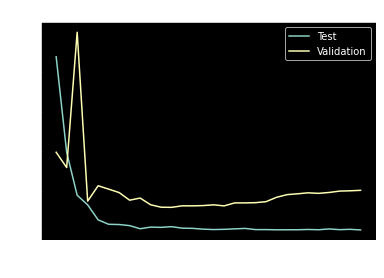

In [18]:
#Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [19]:
def names(number):
    if number==0:
        return 'Real'
    else:
        return 'Fake'

100.0% Confidence This Is Fake


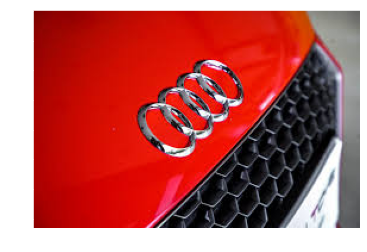

In [20]:
#Image Representation
from matplotlib.pyplot import imshow
img = Image.open(r"D:\Logos\Fake\images.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [21]:
model.save('fake_logo_CNN_model.h5')

99.99998807907104% Confidence This Is Real


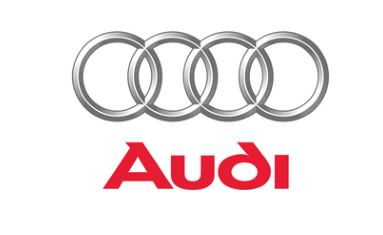

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\Logos\Real\Audi-Logo-Design.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [23]:
#Predicting on the basis of test data
pred=[]
for i in x_test:
    x = i.reshape(1,128,128,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    pred.append(classification)

In [24]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [25]:
y=[]
for i in y_test:
     classification = np.where(res == np.amax(res))[1][0]
     y.append(classification)

In [26]:
y=[]
for i in y_test:
    y.append(int(i[0]))

In [27]:
accuracy_score(y,pred)

0.32941176470588235

In [28]:
recall_score(y,pred)

0.3333333333333333

In [29]:
f1_score(y,pred)

0.35955056179775274

In [30]:
precision_score(y,pred)

0.3902439024390244